<a href="https://colab.research.google.com/github/bimeshupreti/-Movie-Genre-Classification/blob/main/_Movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project is about  movie genre classification based on the summary. The data is downloaded from Kaggle. Multinomial NB Classifier and Natural-Language-Processing  is used to model the data**

In [ ]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

Exploring the Dataset 

In [ ]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [ ]:
df.shape

(22579, 3)

In [ ]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

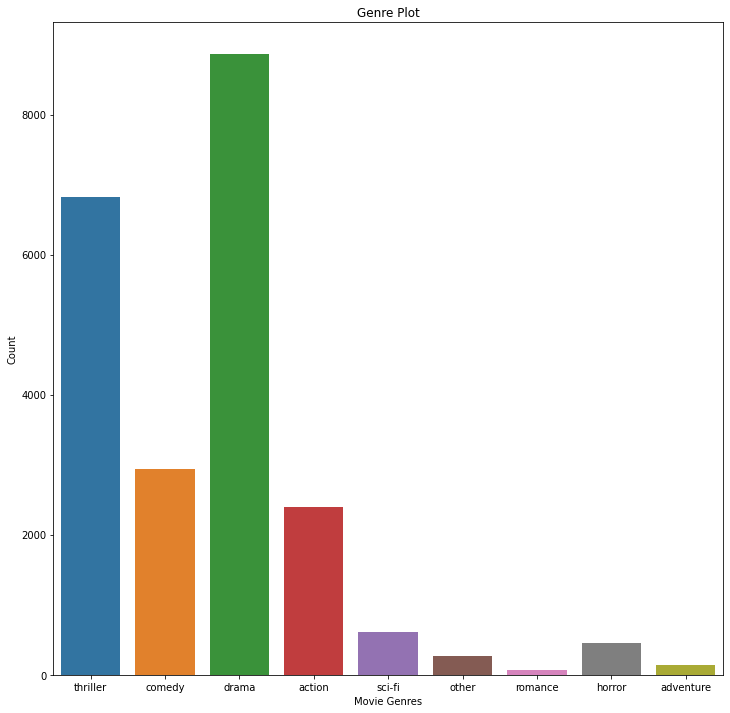

In [ ]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()


Data Cleaning and Preprocessing

In [ ]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [ ]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [ ]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [ ]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [ ]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.shape

(22579, 2)

In [ ]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [ ]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [ ]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [ ]:
len(corpus)

22579

In [ ]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

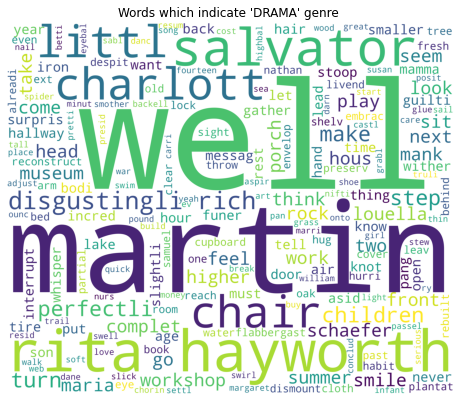

In [ ]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

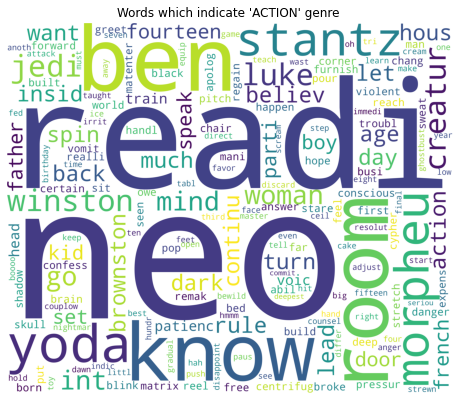

In [ ]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()


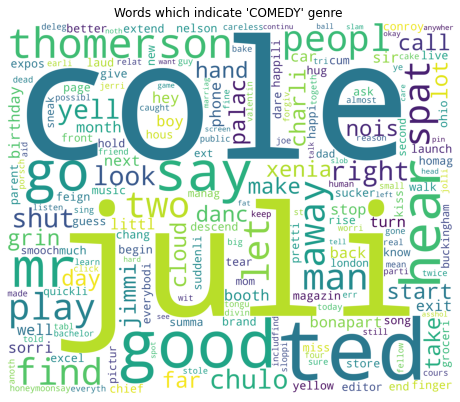

In [ ]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = df['genre'].values

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


Multinomial Naive Bayes

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [ ]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

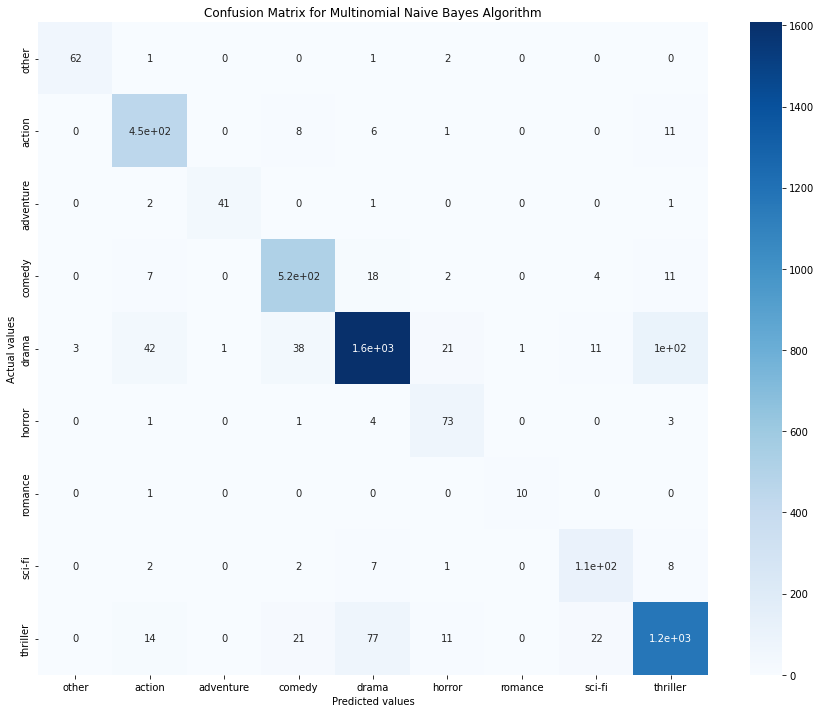

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

Prediction

In [ ]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [ ]:
# For generating random integer
from random import randint

In [ ]:
# Loading test dataset
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [ ]:
test.shape

(5589, 2)

In [ ]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: octor. You work in a madhouse. Your every waking moment is governed by the insane. ROYER COLLARD with a sigh I pray you be succinct. RENEE PELAGIE You're new to Charenton, yes? Perhaps you're not yet familiar with my husband, and his unusual case. ROYER COLLARD With all due respect, Madame, all France is familiar with your husband. to MONSIEUR PROUIX Grant us a moment alone, won't you, Monsieur Prouix? MONSIEUR PROUIX Happily, sir. Your servant, sir. He gestures for the CRAFTSMEN to follow him out. The room a veritable hive of activity is now silent. DR. ROYER COLLARD offers RENEE PELAGIE a seat. ROYER COLLARD Madame, please. RENEE sits. ROYER COLLARD I assume you've come to plead for clemency on your husband's behalf. RENEE PELAGIE Oh you do, do you? It is my dearest hope, Doctor, that he remain entombed forever, and that when at last he perishes in the dank bowels of your institution, he be left as carrion for the rodents and the worms. The DOCTOR's somewhat taken aback ROYER

In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ve to write in an aglet. LISA A what? MILO It's how on line services push logos they wanna sell you. You don't ask for 'em, they just appear. 'Have to work on it somewhere besides my office or my house. And then the quality of the broadcast wouldn't exactly be digital, that's 12 months away. LISA But they'd still get the idea, right? MILO You'd have to design a graphic interface to make the data pop. Maybe some audio, too. To tie it all in to Gary. How long would that take you? LISA It's a standard GUI. Once I've got a concept, it's maybe three day's work. MILO Gary knows I'm close on Skywire. We have to do this fast. LISA Before they kill somebody else, too. MILO a new wrinkle Oh, man. I'd have to get into Gary's house. To get the satellite positions. LISA You mean break in? MILO I don't know LISA And what if the broadcast dishes on top of 21 aren't hot yet? You said the place isn't finished. The complications pile up. They walk. They think. LISA I'll go look. when he looks du

In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: a, get him a glass of water. Frank watches as Kanita gets up, walks to the kitchen. Coates places the pill in his hand. FRANK Is this what you gave Mary? COATES That's the stuff. I call it the Red Lion. Very king of the jungle. No language, only brute power. You can't believe how relaxing it is. Kanita returns with a glass of water, gives it to Frank Coates stands, feeds the fish. COATES Frank, I'm trying to help you. Drink up. Frank swallows the white pill, drinks the water. He places his arms on the chair FRANK I guess I'll be going. COATES Just take it easy. Frank looks around the smoke filled room. Kanita walks over, extends her hand. KANITA Take my pulse. he does It's good, isn't it? FRANK Perfect. KANITA I knew it. I was wrong about you. You're not so bad. Kanita runs her hand across his shoulders. Frank starts to nod. The room getting warm and dark. His eyelids lower sleep, precious sleep. CUT TO FRANK'S ROSE DREAM Voices and sounds echo through the purple haze as Frank'

In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ut with Caitlin, in which case you'll have to close the store tonight. RANDAL All right, but you're missing out. Chicks with dicks. DANTE puts cats on counter I'll read the book. DANTE exits. A CUSTOMER comes back to the counter. He pets the cat. CUSTOMER Cute cat. What's his name. RANDAL Peptic ulcer. CUT TO EXT CONVENIENCE STORE. NIGHT JAY and SILENT BOB watch as DANTE passes. A small group of burners are poised around the store door. JAY carefully writes on a large piece of paper, using a thick marker. SILENT BOB hands him the scissors. JAY slowly cuts the large piece of paper. SILENT BOB hands him the tape. JAY snaps off a few pieces, and plasters the sign to the convenience store door. It is a large word balloon, and it reads I EAT COCK! Once in place, he raps on the window. RANDAL looks out, his face adjacent to the word balloon, making it appear as if he is saying he eats cock. The small group laughs hysterically. CUT TO INT CONVENIENCE STORE. NIGHT CAITLIN enters, carry

In [ ]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: e stuff but noticing Bucky You tell her Bucky. Reason with her. BUCKY She's right, Lee. You've pulled at least three misdemeanors here. It's out of control Bucky stops himself short, studying Lee's strained face. BUCKY cont'd to Kay I promised him a week on it. Four more days and it's over. KAY Dwight, you can be so gutless sometimes. She turns on them both and goes back inside. Before Lee can make a wisecrack Bucky kicks his way through the LAPD papers back to his car... INT. LAVERNE'S HIDEAWAY NIGHT Bucky sits low in his car, watching THE WHITE PACKARD parked near the front of LaVerne's. He's been there awhile... Finally the woman from the night before exits and heads for her car. He jumps out and walks quickly to intercept her while she's fumbling for her keys. BUCKY Slumming, Miss Sprague? She sighs, exasperated. MADELEINE I am now. Daddy spying on me again? She pulls a wad of cash out of her purse. Switching to a very deft imitation of a Scotchman's burr MADELEINE cont'd M